In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('GOOGL.csv')

In [3]:
print(df.head())

         Date       Open       High        Low      Close  Adj Close    Volume
0  2004-08-19  50.050049  52.082081  48.028027  50.220219  50.220219  44659096
1  2004-08-20  50.555557  54.594597  50.300301  54.209209  54.209209  22834343
2  2004-08-23  55.430431  56.796799  54.579578  54.754753  54.754753  18256126
3  2004-08-24  55.675674  55.855858  51.836838  52.487488  52.487488  15247337
4  2004-08-25  52.532532  54.054054  51.991993  53.053055  53.053055   9188602


In [4]:
df = df[['Date', 'Close']]
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)


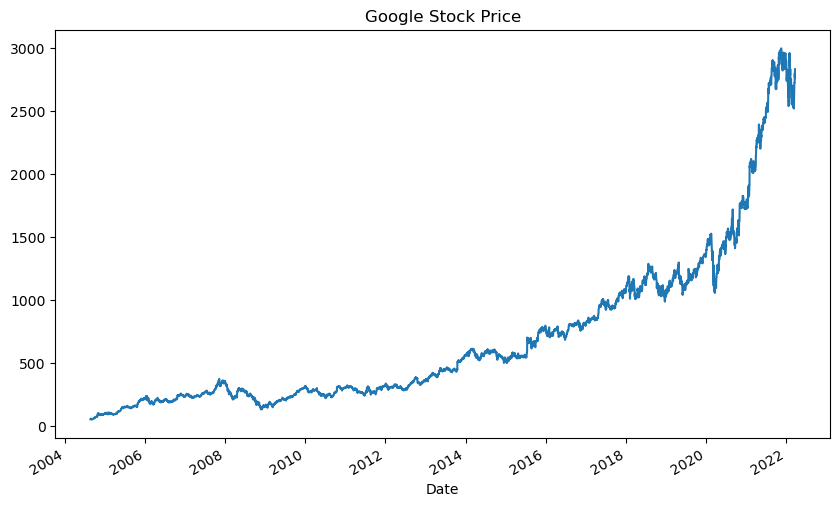

In [5]:
df['Close'].plot(figsize=(10, 6))
plt.title("Google Stock Price")
plt.show()

In [6]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

In [7]:
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

In [8]:
time_step = 60 

In [9]:
X, y = create_dataset(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [10]:
model = Sequential()

# Add LSTM layers
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)


C:\Users\SUJAL\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0031
Epoch 2/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.1154e-05
Epoch 3/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 5.4563e-05
Epoch 4/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.7359e-05
Epoch 5/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 3.9006e-05
Epoch 6/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 3.6928e-05
Epoch 7/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.8730e-05
Epoch 8/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 3.1209e-05
Epoch 9/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.4889e-05
Epoch 10/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.2617e-05


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


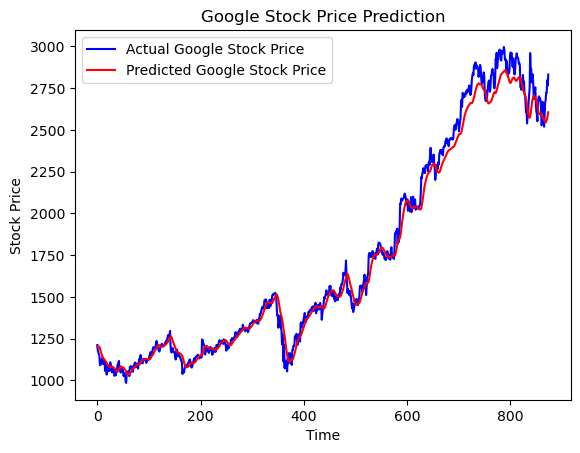

In [11]:
# Predict stock prices on the test set
y_pred = model.predict(X_test)

# Inverse the scaling to get original values
y_pred_scaled = scaler.inverse_transform(y_pred)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot actual vs predicted values
plt.plot(y_test_scaled, color='blue', label='Actual Google Stock Price')
plt.plot(y_pred_scaled, color='red', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [12]:
from sklearn.metrics import mean_squared_error

# Calculate MSE
mse = mean_squared_error(y_test_scaled, y_pred_scaled)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 4922.03972489962
